In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("mall_income.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
dataset=df.iloc[:,[3,4]]
dataset.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
# calucalte episnol value(E)
from sklearn.neighbors import NearestNeighbors
NN=NearestNeighbors(n_neighbors=2)
X=NN.fit(dataset)
distance ,indeces=X.kneighbors(dataset)


In [9]:
distance=np.sort(distance ,axis=0)
distance=distance[:,1]


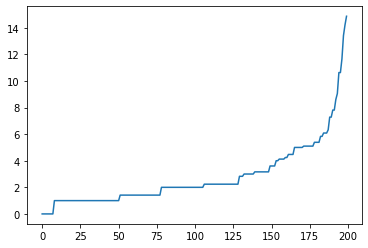

In [10]:
plt.plot(distance)

# sharp turn at y=8
# Then Episnol value =8
# Min points =4

In [11]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8,min_samples=4).fit(dataset)
dbscan

DBSCAN(eps=8, min_samples=4)

In [12]:
labels=dbscan.labels_  # no of Clusters it forms  -1 all arae outliers
labels

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0,  3,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1,  6,
       -1,  6,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

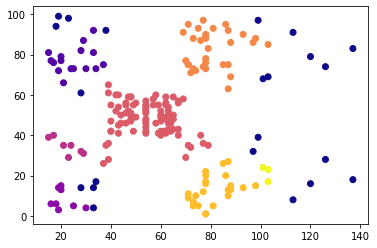

In [13]:
plt.scatter(dataset["Annual_Income_(k$)"] ,dataset["Spending_Score"] ,c=labels ,cmap="plasma" )

In [14]:
df1=pd.read_csv("income.csv")
df1.head()

,Name,Age,Income($),Gender
0,Rob,27,70000,male
1,Bob,29,90000,male
2,Luci,29,61000,female
3,Joy,28,60000,male
4,Sky,42,150000,female


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
income=df1.iloc[:,[1,2]]
income.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [17]:
from sklearn.neighbors import NearestNeighbors
NS=NearestNeighbors(n_neighbors=2)
Q=NS.fit(income)
dist,ind=Q.kneighbors(income)
dist


array([[0.00000000e+00, 2.00000100e+03],
       [0.00000000e+00, 3.00000017e+03],
       [0.00000000e+00, 1.00000050e+03],
       [0.00000000e+00, 1.00000050e+03],
       [0.00000000e+00, 5.00000090e+03],
       [0.00000000e+00, 1.00000450e+03],
       [0.00000000e+00, 2.00000225e+03],
       [0.00000000e+00, 2.00000225e+03],
       [0.00000000e+00, 1.00000450e+03],
       [0.00000000e+00, 1.00000000e+01],
       [0.00000000e+00, 3.00000267e+03],
       [0.00000000e+00, 6.00000000e+00],
       [0.00000000e+00, 1.50000133e+03],
       [0.00000000e+00, 1.50000033e+03],
       [0.00000000e+00, 1.50000033e+03],
       [0.00000000e+00, 2.00000400e+03],
       [0.00000000e+00, 8.00000000e+00],
       [0.00000000e+00, 1.00000200e+03],
       [0.00000000e+00, 1.00000200e+03],
       [0.00000000e+00, 2.00000025e+03],
       [0.00000000e+00, 1.00028796e+03],
       [0.00000000e+00, 2.00015624e+03],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.00000000e+00],
       [0.000000

In [18]:
dist=np.sort(dist ,axis=0)
dist=dist[:,-1]
dist

array([0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 9.00000000e+00, 1.00000000e+01, 1.00000000e+01,
       1.00000050e+03, 1.00000050e+03, 1.00000200e+03, 1.00000200e+03,
       1.00000450e+03, 1.00000450e+03, 1.00028796e+03, 1.00028796e+03,
       1.50000033e+03, 1.50000033e+03, 1.50000133e+03, 2.00000025e+03,
       2.00000100e+03, 2.00000100e+03, 2.00000100e+03, 2.00000225e+03,
       2.00000225e+03, 2.00000400e+03, 2.00001600e+03, 2.00015624e+03,
       3.00000017e+03, 3.00000017e+03, 3.00000267e+03, 3.00000267e+03,
       5.00000090e+03, 8.00000400e+03, 1.00000001e+04])

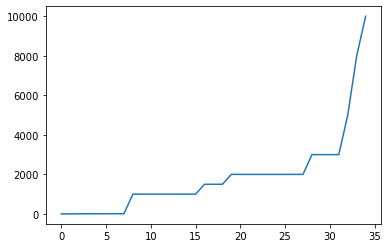

In [19]:
plt.plot(dist)